### Project Name: Fradulent Transaction Detection using Machine Learning Techniques 
- __Submitted by: Murtaza Kanchwala__
- __Contact: 8305309153__
- __Email: murtazakanchwala1@gmail.com__


### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore")



In [ ]:
a = 'python'

## Reading the data 

In [2]:
payment_data = pd.read_csv("Payment_Data.csv")

In [3]:
payment_data.head()

accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3             503         1   4.886641    creditcard              0.000000   
4            2000         1   5.040929    creditcard              0.000000   

      Category  isWeekend  label  
0     shopping        0.0      0  
1  electronics        0.0      0  
2         food        1.0      0  
3  electronics        1.0      0  
4     shopping        0.0      0

In [4]:
payment_copy = payment_data.copy() # Making a copy of original dataset

### Shape of the Data 

In [5]:
print(payment_copy.shape)
print(f"The No of Features in the dataset is: {payment_copy.shape[1]}")
print(f"The No of Records in the dataset is: {payment_copy.shape[0]}")

(39221, 8)
The No of Features in the dataset is: 8
The No of Records in the dataset is: 39221


### Getting General Information about the Data set

In [6]:
payment_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


- There is presence of null values in 'Category' and 'isWeekend' features.

In [7]:
payment_copy.describe(include='all')

accountAgeDays      numItems     localTime paymentMethod  \
count     39221.000000  39221.000000  39221.000000         39221   
unique             NaN           NaN           NaN             3   
top                NaN           NaN           NaN    creditcard   
freq               NaN           NaN           NaN         28004   
mean        857.563984      1.084751      4.748232           NaN   
std         804.788212      0.566899      0.389360           NaN   
min           1.000000      1.000000      0.421214           NaN   
25%          72.000000      1.000000      4.742303           NaN   
50%         603.000000      1.000000      4.886641           NaN   
75%        1804.000000      1.000000      4.962055           NaN   
max        2000.000000     29.000000      5.040929           NaN   

        paymentMethodAgeDays  Category     isWeekend         label  
count           39221.000000     39126  38661.000000  39221.000000  
unique                   NaN         3           NaN           NaN  
top                      NaN  shopping           NaN           NaN  
freq                     NaN     13328           NaN           NaN  
mean              122.641326       NaN      0.499547      0.014278  
std               283.569177       NaN      0.500006      0.118636  
min                 0.000000       NaN      0.000000      0.000000  
25%                 0.000000       NaN      0.000000      0.000000  
50%                 0.012500       NaN      0.000000      0.000000  
75%                87.510417       NaN      1.000000      0.000000  
max              1999.580556       NaN      1.000000      1.000000

## Null Values check 

In [8]:
payment_copy.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [9]:
round(payment_copy.isnull().sum()/len(payment_data)*100,2)

accountAgeDays          0.00
numItems                0.00
localTime               0.00
paymentMethod           0.00
paymentMethodAgeDays    0.00
Category                0.24
isWeekend               1.43
label                   0.00
dtype: float64

- There is only 1.43% and 0.24% null values present in 'isWeekend' and 'Category' features.
- This is in the acceptable range hence we will impute this null values.
- Both features are categorical type features hence we will impute the null values using MODE.

### Checking Duplicate Values

In [10]:
payment_copy.duplicated().sum()

3033

### Droping the Duplicated Values 

In [11]:
payment_copy=payment_copy.drop_duplicates(ignore_index =True)

In [12]:
payment_copy.duplicated().sum()

0

### Imputing the Null Values

In [13]:
payment_copy["isWeekend"] =payment_copy["isWeekend"].fillna(value=payment_copy["isWeekend"].mode()[0])
payment_copy["Category"] =payment_copy["Category"].fillna(value=payment_copy["Category"].mode()[0])

In [14]:
payment_copy.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

In [15]:
payment_copy["isWeekend"].unique()

array([0., 1.])

In [16]:
payment_copy["Category"].unique()

array(['shopping', 'electronics', 'food'], dtype=object)

### Checking the Target Variable 

In [17]:
payment_copy.label.value_counts(normalize=True)

0    0.989057
1    0.010943
Name: label, dtype: float64

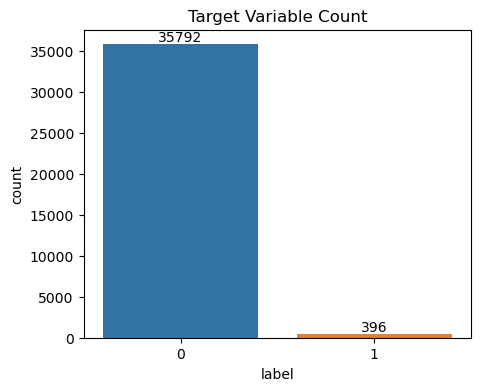

In [18]:
plt.figure(figsize=(5,4))
fig=sns.countplot(x='label',data =payment_copy)
fig.bar_label(fig.containers[0])
plt.title("Target Variable Count")
plt.show()

- The dataset is heavily imbalanced

## Univariate Analysis

In [19]:
for i in payment_copy:
    print(f"The number of unique values in {i} is: {payment_copy[i].nunique()}")
    print()
    print("*******************************************************************************")
    

The number of unique values in accountAgeDays is: 1999

*******************************************************************************
The number of unique values in numItems is: 14

*******************************************************************************
The number of unique values in localTime is: 25

*******************************************************************************
The number of unique values in paymentMethod is: 3

*******************************************************************************
The number of unique values in paymentMethodAgeDays is: 17094

*******************************************************************************
The number of unique values in Category is: 3

*******************************************************************************
The number of unique values in isWeekend is: 2

*******************************************************************************
The number of unique values in label is: 2

*********************************

In [20]:
for i in payment_copy:
    print(f"The number of unique values in {i} is: {payment_copy[i].unique()}")
    print("---------------------------------------------------------------------------------------------------------")
    print()

The number of unique values in accountAgeDays is: [  29  725  845 ... 1867 1166 1512]
---------------------------------------------------------------------------------------------------------

The number of unique values in numItems is: [ 1  2  3  4  5 10  6 12  8 15 29  9  7 11]
---------------------------------------------------------------------------------------------------------

The number of unique values in localTime is: [4.745402  4.742303  4.921318  4.886641  5.040929  4.962055  4.921349
 4.876771  4.748314  4.461622  4.505662  4.836982  4.895263  5.034622
 4.057414  3.483951  2.596228  5.017904  4.965339  4.52458   2.94894
 3.066058  3.575983  3.954522  0.4212135]
---------------------------------------------------------------------------------------------------------

The number of unique values in paymentMethod is: ['paypal' 'storecredit' 'creditcard']
---------------------------------------------------------------------------------------------------------

The number of u

### Account Age Days 

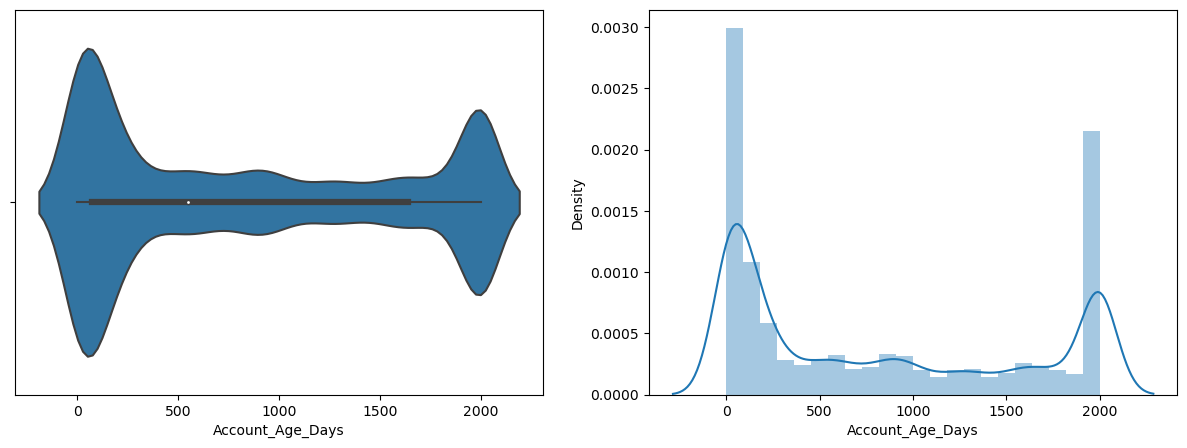

In [21]:
fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
sns.violinplot(x="accountAgeDays" ,data=payment_copy)
plt.xlabel("Account_Age_Days")

fig.add_subplot(1,2,2)
sns.distplot(x=payment_copy.accountAgeDays)
plt.xlabel("Account_Age_Days")

plt.show()

### Payment Method Age Days

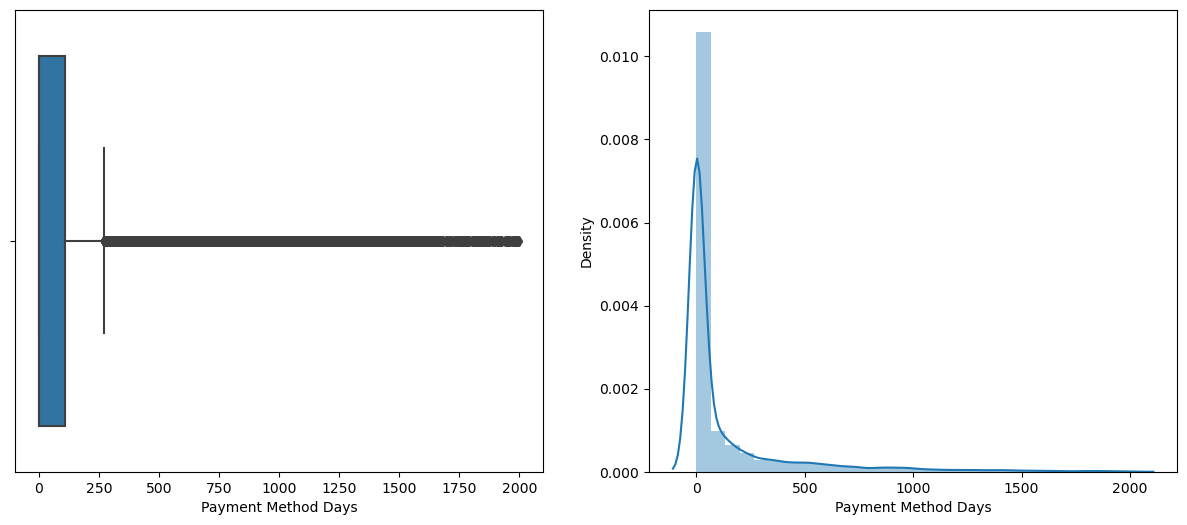

In [22]:
fig=plt.figure(figsize=(15,6))

fig.add_subplot(1,2,1)
sns.boxplot(x=payment_copy["paymentMethodAgeDays"])
plt.xlabel("Payment Method Days")

fig.add_subplot(1,2,2)
sns.distplot(x=payment_copy["paymentMethodAgeDays"],bins=30)
plt.xlabel("Payment Method Days")
plt.show()

### Number of Items 

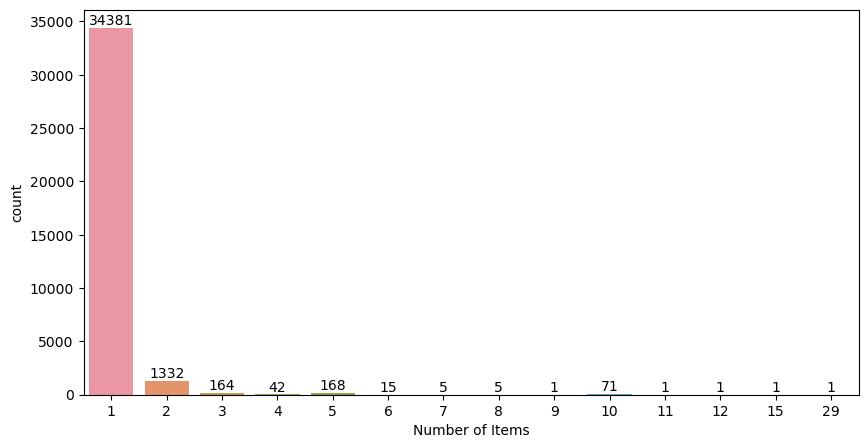

In [23]:
plt.figure(figsize=(10,5))
fig=sns.countplot(x=payment_copy.numItems)
fig.bar_label(fig.containers[0])
plt.xlabel("Number of Items")
plt.show()

- There is very much imbalance in the values of Number of Items as majority of the records i.e 34381(95% of Total) have value as '1'.
- Only 5% of the records have the values other than '1'.
- To treat this imbalance, the column 'numItems' can be categorized into two values:
- 1) All the records having the value as 1 can be replace by "one".
- 2) All the values greater than one can be replace as "more".

### Treating the imbalance 

In [24]:
count =0
for i in range(len(payment_copy)):
    if payment_copy.numItems[i]==1:
        payment_copy.numItems[i] = 'one'
    elif payment_copy.numItems[i]>1:
        payment_copy.numItems[i] = 'more'

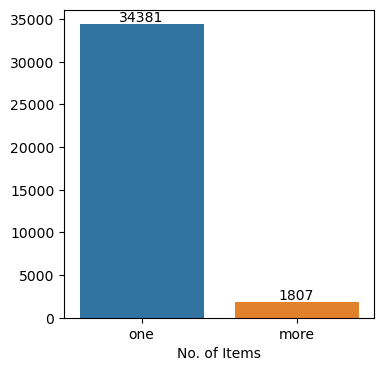

In [25]:
plt.figure(figsize=(4,4))
fig=sns.countplot(x=payment_copy.numItems)
fig.bar_label(fig.containers[0])
plt.xlabel("No. of Items")
plt.ylabel(None)
plt.show()

### Payment Method

In [26]:
fig=px.pie(payment_copy, names= "paymentMethod", title="Payment Methods")
fig.update_traces(textposition='inside', textinfo='percent+label')

#### Insights:
- The most used payment method is Credit Card

### Weekend 

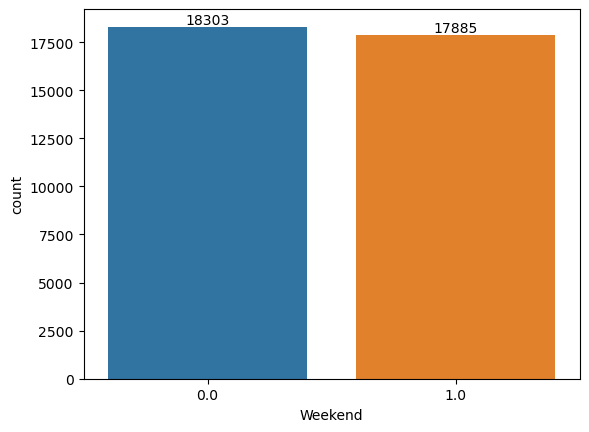

In [27]:
fig=sns.countplot(x=payment_copy.isWeekend)
fig.bar_label(fig.containers[0])
plt.xlabel("Weekend")
plt.show()

### Category

In [28]:
fig=px.pie(payment_copy,names= "Category", hole=0.5, title="Category wise Transactions" )
fig.update_traces(textposition='inside', textinfo='percent+label')

### Time of Transaction

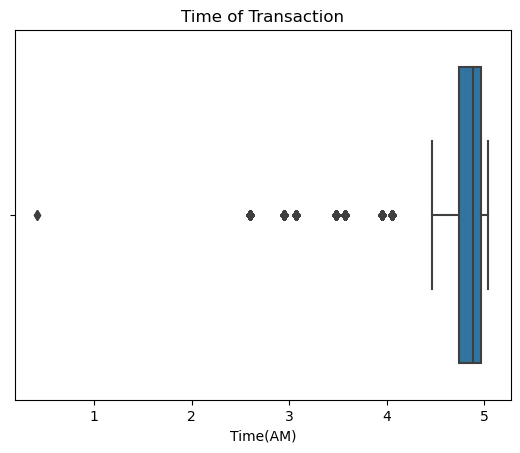

In [29]:
sns.boxplot(x="localTime", data=payment_copy)
plt.xlabel("Time(AM)")
plt.title("Time of Transaction")
plt.show()

#### Insights:
- Almost all the Transactions has been done during 4am to 5am.

## Bi -Variate Analysis

In [30]:
# Mapping the labels as safe and Fraudulent for Data visualization Purpose
dummy_df = payment_copy.copy()
dummy_df.label = dummy_df.label.map({0:"Safe",1:"Fraudulent"})

In [31]:
dummy_df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')

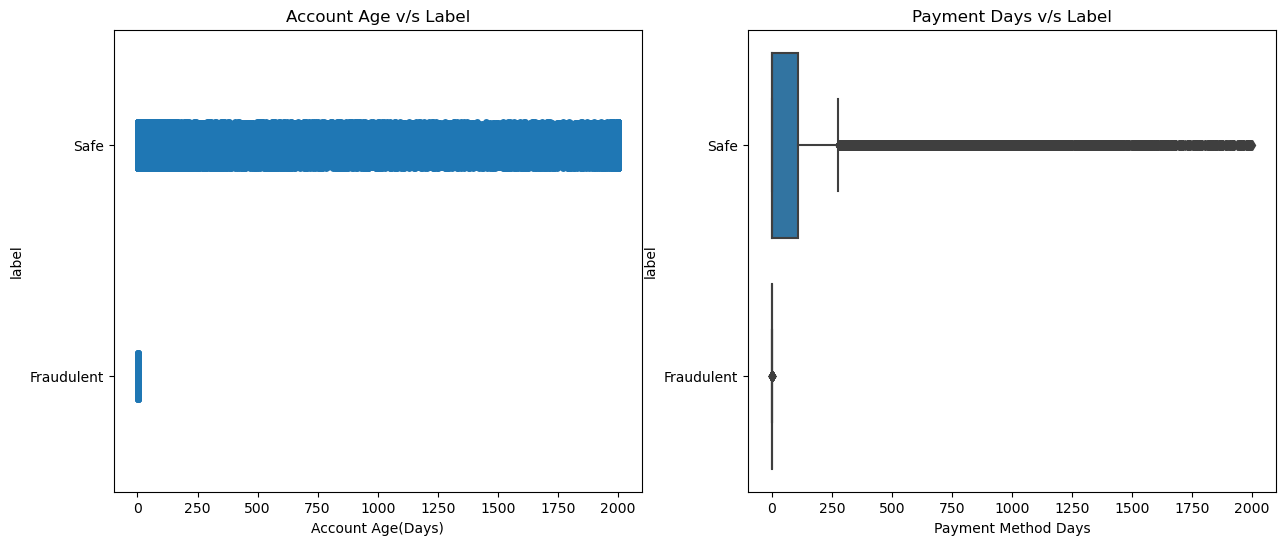

In [32]:
fig=plt.figure(figsize=(15,6))

fig.add_subplot(1,2,1)
sns.stripplot(x="accountAgeDays", y="label", data=dummy_df)
plt.title("Account Age v/s Label")
plt.xlabel("Account Age(Days)")

fig.add_subplot(1,2,2)
sns.boxplot(x="paymentMethodAgeDays", y="label", data=dummy_df)
plt.title("Payment Days v/s Label")
plt.xlabel("Payment Method Days")

plt.show()

#### Insights:
- From the above two visual we can see that Fraud transactions are done with the accounts which have Account Age and Payment Method days has around less than or equal to 1 days.

- So by taking this condition we have created another visuals below.

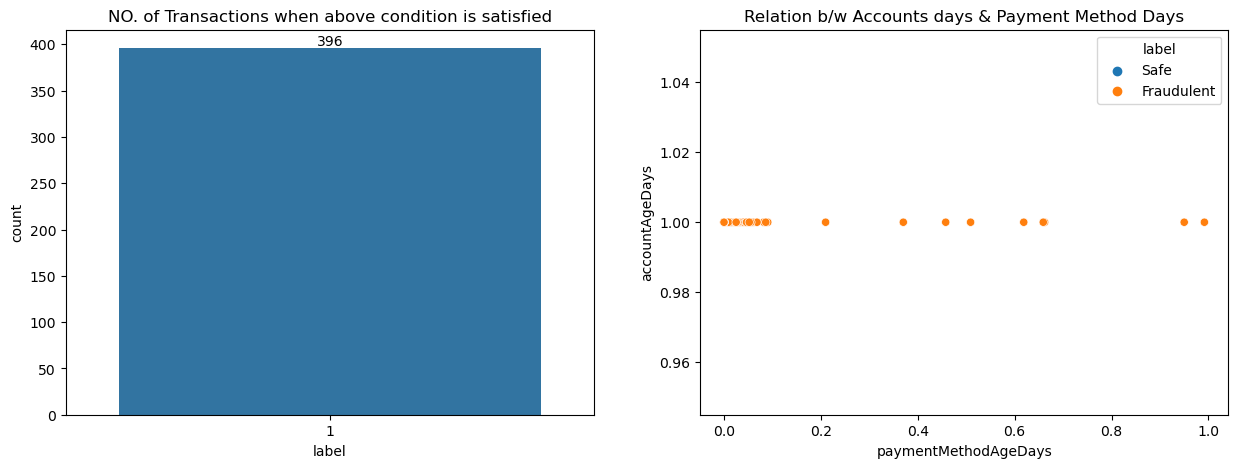

In [33]:
df_1 =payment_copy[(payment_copy["paymentMethodAgeDays"]<=1)&(payment_copy["accountAgeDays"]<=1)]

fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
fg=sns.countplot(x=df_1.label)
fg.bar_label(fg.containers[0])
plt.title("NO. of Transactions when above condition is satisfied")

fig.add_subplot(1,2,2)
sns.scatterplot(x=df_1.paymentMethodAgeDays, y=df_1.accountAgeDays, hue=dummy_df.label)
plt.title("Relation b/w Accounts days & Payment Method Days")
plt.show()

#### Insights:
- By above visuals we can conclude that, All the transactions i.e 396 transactions that are happend with the accounts which have Account Age and Payment Method Days equal to or less than 1 Days are Fraud transactions.

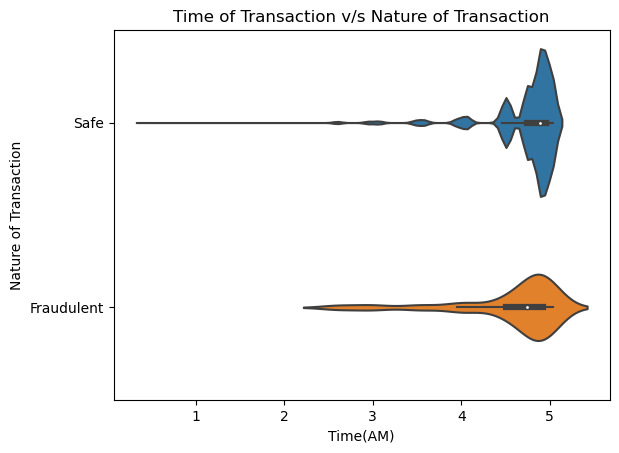

In [34]:
sns.violinplot(x="localTime", y="label" ,data=dummy_df)
plt.title("Time of Transaction v/s Nature of Transaction")
plt.xlabel("Time(AM)")
plt.ylabel("Nature of Transaction")
plt.show()

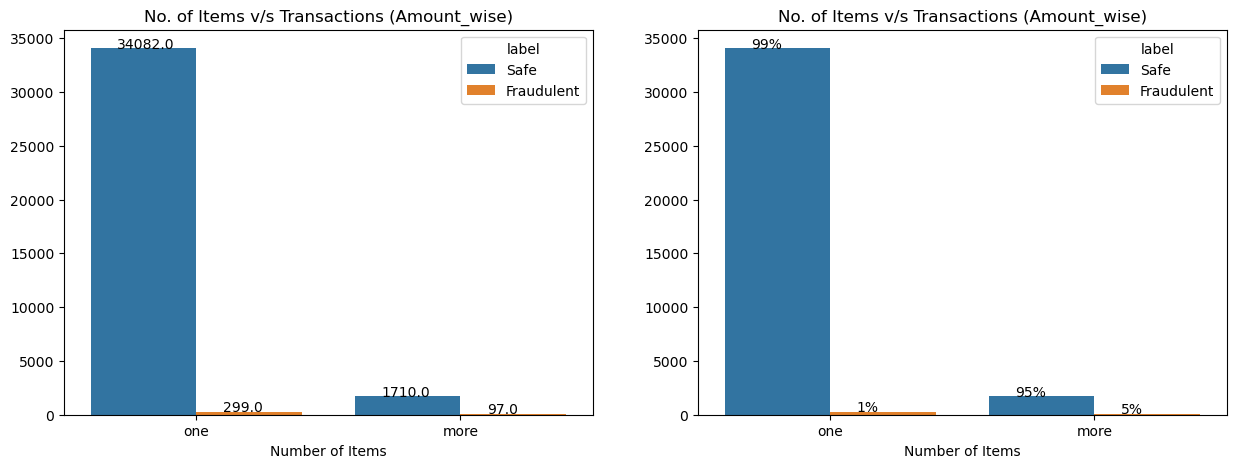

In [35]:
fig =plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)

ax=sns.countplot(x="numItems",data=dummy_df,hue="label")

c=len(ax.patches)
no =[]   # creating the list of the number of Fraudulent Transactions .
no_x=[]  # creating the list of the X-Coordinate of Fraudulent Transactions.
yes=[]   # creating the list of the number of Safe Transactions.
yes_x=[] # creating the list of the X-Coordinate of Safe Transactions.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
    else:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=no[j]  # Fetching the percentage of Fraudulent Transactions
    x=no_x[j]+0.1
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of Fraudulent Transactions.
for k in range(len(yes)):
    value=yes[k] # Fetching the percentage of Safe
    x=yes_x[k]+0.1
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of Safe.
plt.xlabel("Number of Items")
plt.ylabel(None)
plt.title("No. of Items v/s Transactions (Amount_wise)")

fig.add_subplot(1,2,2)
ax=sns.countplot(x="numItems",data=dummy_df,hue="label")

c=len(ax.patches)
no =[]   # creating the list of the number of Fraudulent Transactions .
no_x=[]  # creating the list of the X-Coordinate of Fraudulent Transactions.
yes=[]   # creating the list of the number of Safe Transactions.
yes_x=[] # creating the list of the X-Coordinate of Safe Transactions.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
    else:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round(no[j]/(yes[j]+no[j])*100))+"%"  # Fetching the percentage of Fraudulent Transactions
    x=no_x[j]+0.1
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of Fraudulent Transactions.
for k in range(len(yes)):
    value=str(round(yes[k]/(yes[k]+no[k])*100))+"%" # Fetching the percentage of Safe
    x=yes_x[k]+0.1
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of Safe.
plt.xlabel("Number of Items")
plt.ylabel(None)
plt.title("No. of Items v/s Transactions (Amount_wise)")



plt.show()

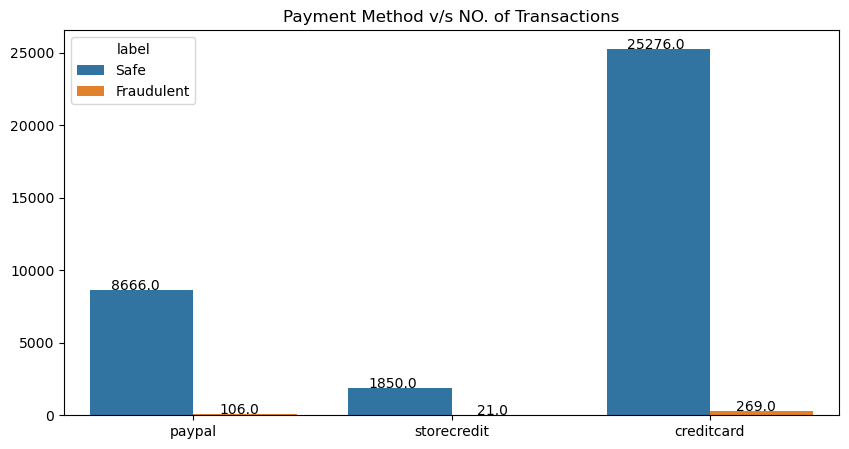

In [36]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="paymentMethod" ,data=dummy_df, hue="label")

c=len(ax.patches)
fraud =[]   # creating the list of the number of Fraudulent Transactions .
fraud_x=[]  # creating the list of the X-Coordinate of Fraudulent Transactions.
safe=[]   # creating the list of the number of Safe Transactions.
safe_x=[] # creating the list of the X-Coordinate of Safe Transactions.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        safe.append(i.get_height())
        safe_x.append(i.get_x())
        c-=1
    else:
        fraud.append(i.get_height())
        fraud_x.append(i.get_x())
        c-=1
for j in range(len(fraud)):
    value=fraud[j]  # Fetching the amount of Fraudulent Transactions
    x=fraud_x[j]+0.1
    y=fraud[j]+0.3
    plt.annotate(value,(x,y)) # Printing the amount of Fraudulent Transactions.
for k in range(len(safe)):
    value=safe[k] # Fetching the amount of Safe
    x=safe_x[k]+0.08
    y=safe[k]+0.3
    plt.annotate(value,(x,y)) # Printing the amount of Safe.
plt.title("Payment Method v/s NO. of Transactions")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

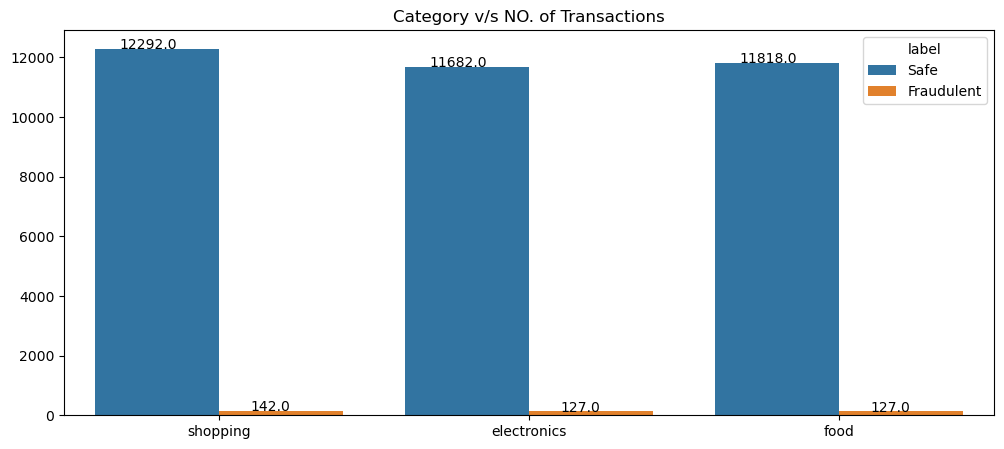

In [37]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x="Category" ,data=dummy_df, hue="label")

c=len(ax.patches)
fraud =[]   # creating the list of the number of Fraudulent Transactions .
fraud_x=[]  # creating the list of the X-Coordinate of Fraudulent Transactions.
safe=[]   # creating the list of the number of Safe Transactions.
safe_x=[] # creating the list of the X-Coordinate of Safe Transactions.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        safe.append(i.get_height())
        safe_x.append(i.get_x())
        c-=1
    else:
        fraud.append(i.get_height())
        fraud_x.append(i.get_x())
        c-=1
for j in range(len(fraud)):
    value=fraud[j]  # Fetching the amount of Fraudulent Transactions
    x=fraud_x[j]+0.1
    y=fraud[j]+0.3
    plt.annotate(value,(x,y)) # Printing the amount of Fraudulent Transactions.
for k in range(len(safe)):
    value=safe[k] # Fetching the amount of Safe
    x=safe_x[k]+0.08
    y=safe[k]+0.3
    plt.annotate(value,(x,y)) # Printing the amount of Safe.
plt.title("Category v/s NO. of Transactions")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Corelation Check

In [38]:
corr_mat= payment_copy.corr()

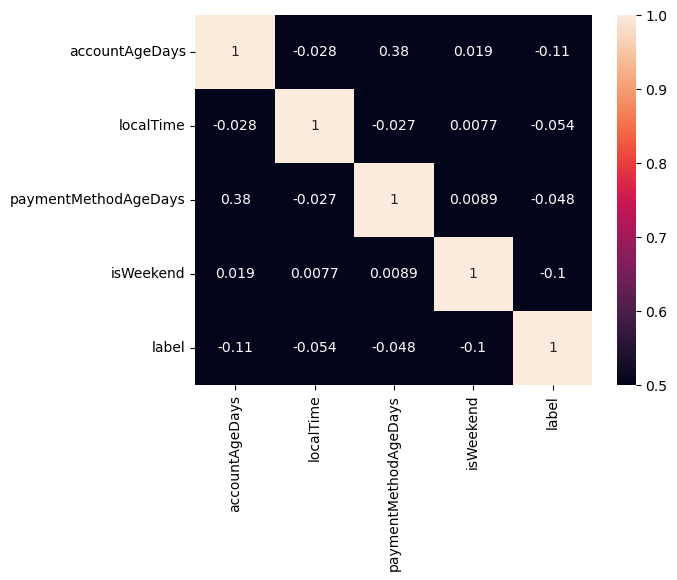

In [39]:
sns.heatmap(corr_mat,
            vmin=0.5,
            vmax=1,
            annot=True,
           )
plt.show()

### Outliers Check

In [40]:
Q1 = payment_copy.quantile(0.25)
Q3 = payment_copy.quantile(0.75)
IQR = Q3 -Q1
Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

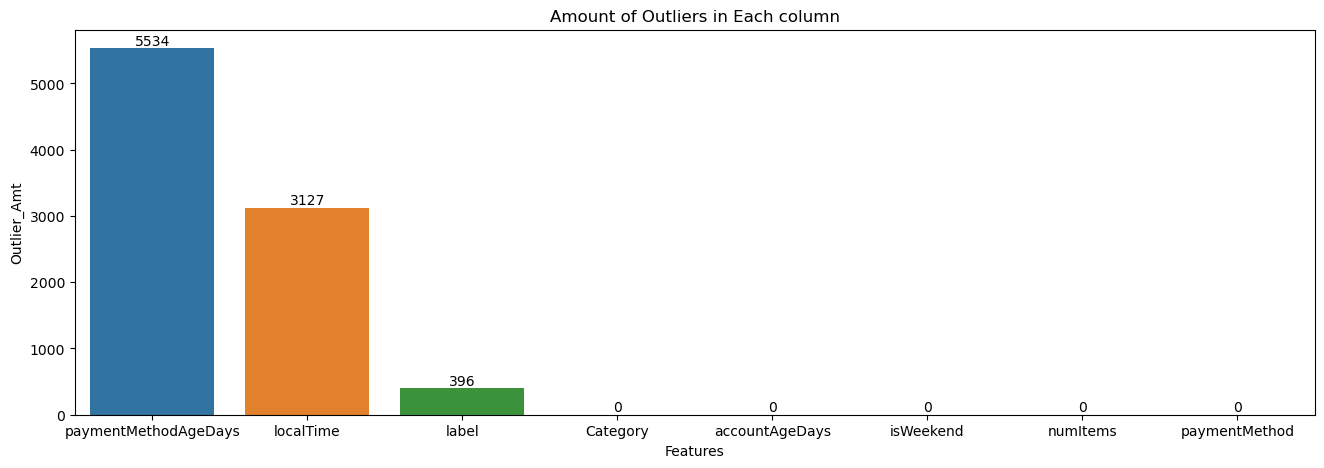

In [41]:
# Showing the amount of outliers in each columns
outliers_amt=((payment_copy>Upper_Limit) | (payment_copy< Lower_Limit)).sum()
amt_df = pd.DataFrame({"Features":outliers_amt.index, "Outlier_Amt":outliers_amt.values})
amt_df=amt_df.sort_values(by="Outlier_Amt", ascending=False)
plt.figure(figsize=(16,5))
fig=sns.barplot(x="Features", y= "Outlier_Amt", data =amt_df)
fig.bar_label(fig.containers[0])
plt.title("Amount of Outliers in Each column")
plt.show()

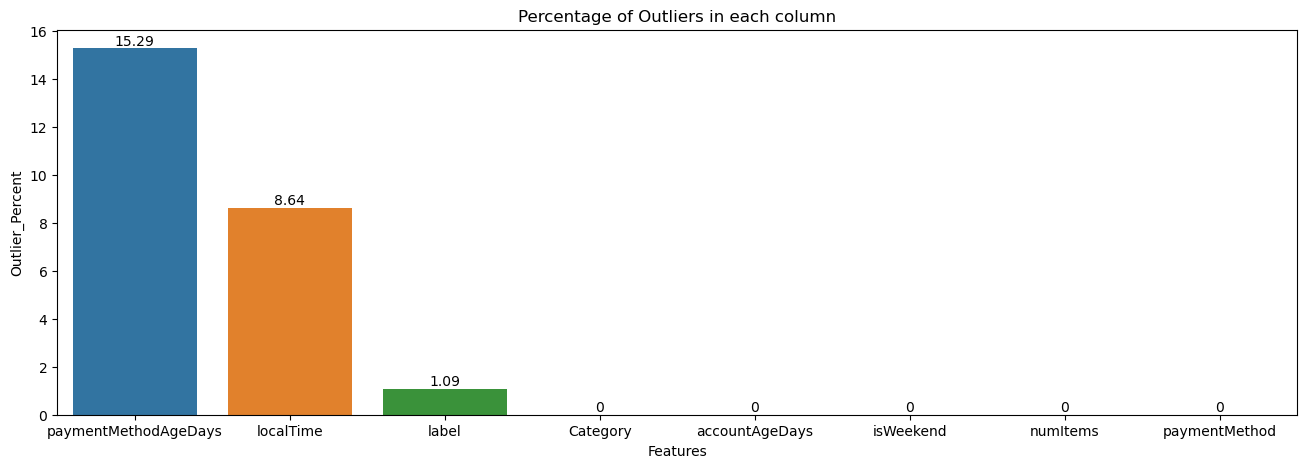

In [42]:
# SHowing Outliers in each columns Percentagewise 
percent_outliers=round(((payment_copy>Upper_Limit) | (payment_copy< Lower_Limit)).sum()/len(payment_copy)*100,2)
percent_df = pd.DataFrame({"Features":percent_outliers.index, "Outlier_Percent":percent_outliers.values})
percent_df=percent_df.sort_values(by="Outlier_Percent", ascending=False)
plt.figure(figsize=(16,5))
fig=sns.barplot(x="Features", y= "Outlier_Percent", data =percent_df)
fig.bar_label(fig.containers[0])
plt.title("Percentage of Outliers in each column")
plt.show()

### Outliers Treatment

In [43]:
def outlier_removal(data):
    for i in data:
        if i !="label":
            if data[i].dtype != "object":
                Q1 = data[i].quantile(0.25)
                Q3 = data[i].quantile(0.75)
                IQR = Q3 - Q1
                UL = Q3 + (1.5*IQR)
                LL = Q1 - (1.5*IQR)
                for j in range(len(data)):
                    if data[i][j]>=UL:
                        data[i][j]=UL
                    if data[i][j]<LL:
                        data[i][j]=LL

In [44]:
outlier_removal(payment_copy)

In [45]:
((payment_copy>Upper_Limit) | (payment_copy< Lower_Limit)).sum()

Category                  0
accountAgeDays            0
isWeekend                 0
label                   396
localTime                 0
numItems                  0
paymentMethod             0
paymentMethodAgeDays      0
dtype: int64

## Data Preprocessing

In [46]:
model_df = payment_copy.copy()

In [47]:
model_df.describe(include="all")

accountAgeDays numItems     localTime paymentMethod  \
count     36188.000000    36188  36188.000000         36188   
unique             NaN        2           NaN             3   
top                NaN      one           NaN    creditcard   
freq               NaN    34381           NaN         25545   
mean        813.805958      NaN      4.808075           NaN   
std         779.398060      NaN      0.199342           NaN   
min           1.000000      NaN      4.412675           NaN   
25%          74.000000      NaN      4.742303           NaN   
50%         550.000000      NaN      4.886641           NaN   
75%        1639.000000      NaN      4.962055           NaN   
max        2000.000000      NaN      5.040929           NaN   

        paymentMethodAgeDays  Category     isWeekend         label  
count           36188.000000     36188  36188.000000  36188.000000  
unique                   NaN         3           NaN           NaN  
top                      NaN  shopping           NaN           NaN  
freq                     NaN     12434           NaN           NaN  
mean               65.931600       NaN      0.494225      0.010943  
std               103.206489       NaN      0.499974      0.104036  
min                 0.000000       NaN      0.000000      0.000000  
25%                 0.000000       NaN      0.000000      0.000000  
50%                 0.154167       NaN      0.000000      0.000000  
75%               108.652431       NaN      1.000000      0.000000  
max               271.631076       NaN      1.000000      1.000000

In [48]:
model_df = pd.get_dummies(model_df, columns=["numItems","paymentMethod","Category"], drop_first=True)

In [49]:
model_df

accountAgeDays  localTime  paymentMethodAgeDays  isWeekend  label  \
0                  29   4.745402             28.204861        0.0      0   
1                 725   4.742303              0.000000        0.0      0   
2                 845   4.921318              0.000000        1.0      0   
3                 503   4.886641              0.000000        1.0      0   
4                2000   5.040929              0.000000        0.0      0   
...               ...        ...                   ...        ...    ...   
36183             986   4.836982              0.000000        0.0      0   
36184            1647   4.876771            271.631076        0.0      0   
36185            1591   4.742303              0.000000        1.0      0   
36186             237   4.921318            236.082639        1.0      0   
36187             272   5.040929              0.000694        0.0      0   

       numItems_one  paymentMethod_paypal  paymentMethod_storecredit  \
0                 1                     1                          0   
1                 1                     0                          1   
2                 1                     0                          0   
3                 1                     0                          0   
4                 1                     0                          0   
...             ...                   ...                        ...   
36183             1                     0                          0   
36184             1                     0                          0   
36185             1                     0                          0   
36186             1                     0                          0   
36187             1                     1                          0   

       Category_food  Category_shopping  
0                  0                  1  
1                  0                  0  
2                  1                  0  
3                  0                  0  
4                  0                  1  
...              ...                ...  
36183              0                  1  
36184              0                  1  
36185              0                  1  
36186              0                  1  
36187              0                  1  

[36188 rows x 10 columns]

### Scaling the Data 

In [50]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [51]:
model_df[['accountAgeDays','paymentMethodAgeDays']] = sc.fit_transform(model_df[['accountAgeDays','paymentMethodAgeDays']])

In [52]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             36188 non-null  float64
 1   localTime                  36188 non-null  float64
 2   paymentMethodAgeDays       36188 non-null  float64
 3   isWeekend                  36188 non-null  float64
 4   label                      36188 non-null  int64  
 5   numItems_one               36188 non-null  uint8  
 6   paymentMethod_paypal       36188 non-null  uint8  
 7   paymentMethod_storecredit  36188 non-null  uint8  
 8   Category_food              36188 non-null  uint8  
 9   Category_shopping          36188 non-null  uint8  
dtypes: float64(4), int64(1), uint8(5)
memory usage: 1.6 MB


### Splitting the Data into Training and Testing Data

In [53]:
x=model_df.drop("label", axis=1)
y=model_df[["label"]]

In [54]:
print(x.shape)
print(y.shape)

(36188, 9)
(36188, 1)


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, stratify=y, random_state=53)

### Class Balancing using SMOTE 

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [58]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [59]:
print(x_train_smote.shape)
print(y_train_smote.shape)
print(x_test.shape)
print(y_test.shape)

(57266, 9)
(57266, 1)
(7238, 9)
(7238, 1)


In [60]:
y_train_smote.value_counts()

label
0        28633
1        28633
dtype: int64

In [61]:
y_test.value_counts()

label
0        7159
1          79
dtype: int64

## Model Building 

### 1) Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
D_tree =DecisionTreeClassifier()

In [63]:
dt= D_tree.fit(x_train_smote, y_train_smote)

y_pred_train_dt = D_tree.predict(x_train)
y_pred_test_dt = D_tree.predict(x_test)

print("Training_Accuracy:",accuracy_score(y_train,y_pred_train_dt))
print("Testing_Accuracy:",accuracy_score(y_test,y_pred_test_dt))

print("Training Report:\n",classification_report(y_train, y_pred_train_dt))
print("Testing Report: \n",classification_report(y_test, y_pred_test_dt))

Training_Accuracy: 1.0
Testing_Accuracy: 1.0
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950

Testing Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238



### Cross Validation

In [64]:
f1_scores = cross_val_score(dt,x_test, y_test, scoring='f1_macro',cv=10 )
print("Max F1-Score:",f1_scores.max())
print("Mean F1-Score:",f1_scores.mean())

Max F1-Score: 1.0
Mean F1-Score: 1.0


In [65]:
accuracy = cross_val_score(dt,x_test, y_test, scoring='accuracy',cv=10 )
print("Max Accuracy:",accuracy.max())
print("Mean Accuracy:",accuracy.mean())

Max Accuracy: 1.0
Mean Accuracy: 1.0


### Tuning the parameters 

In [191]:
parameters = {"criterion":["gini", "entropy", "log_loss"],
              "max_depth":[2,4,8,12],
              "min_samples_split":[2,4,6,8],
              "min_samples_leaf":[1,2,3,4],
              "max_features":["auto","sqrt", "log2"],
              "splitter":["best", "random"]}


cv_dt =GridSearchCV(dt, cv=10,
                    param_grid=parameters,
                    n_jobs=3)

cv_dt.fit(x_train_smote,y_train_smote)
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'best'}


In [63]:
dt_tuned = DecisionTreeClassifier(criterion='gini',
                                  max_depth=4,
                                  max_features='auto',
                                  min_samples_leaf=1,
                                  min_samples_split=8,
                                  splitter='best')

In [64]:
model_dt_tuned = dt_tuned.fit(x_train_smote, y_train_smote)


In [112]:

y_pred_train_tuned_dt = model_dt_tuned.predict(x_train)
y_pred_test_tuned_dt = model_dt_tuned.predict(x_test)

print("Training Accuracy:",accuracy_score(y_train,y_pred_train_tuned_dt))
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_tuned_dt))

print("Training Report:\n",classification_report(y_train,y_pred_train_tuned_dt))
print("Testing Report:\n",classification_report(y_test,y_pred_test_tuned_dt))

Training Accuracy: 0.9905699481865285
Testing Accuracy: 0.9900525006907985
Training Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     28633
           1       0.54      1.00      0.70       317

    accuracy                           0.99     28950
   macro avg       0.77      1.00      0.85     28950
weighted avg       0.99      0.99      0.99     28950

Testing Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7159
           1       0.52      1.00      0.69        79

    accuracy                           0.99      7238
   macro avg       0.76      0.99      0.84      7238
weighted avg       0.99      0.99      0.99      7238



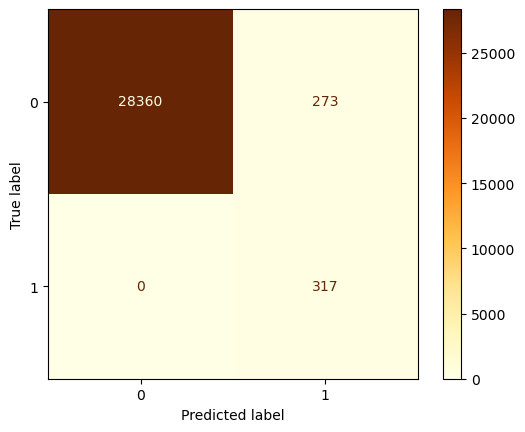

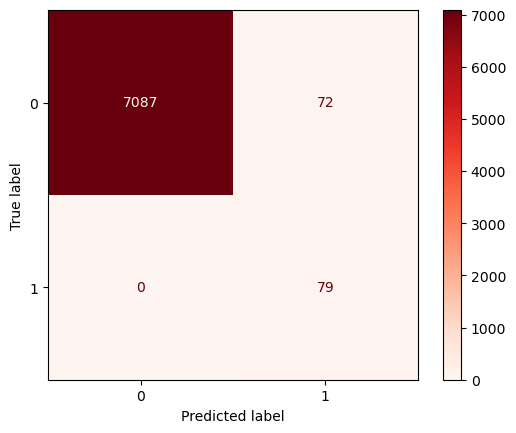

In [113]:
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_tuned_dt,cmap='YlOrBr'))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_tuned_dt,cmap='Reds'))

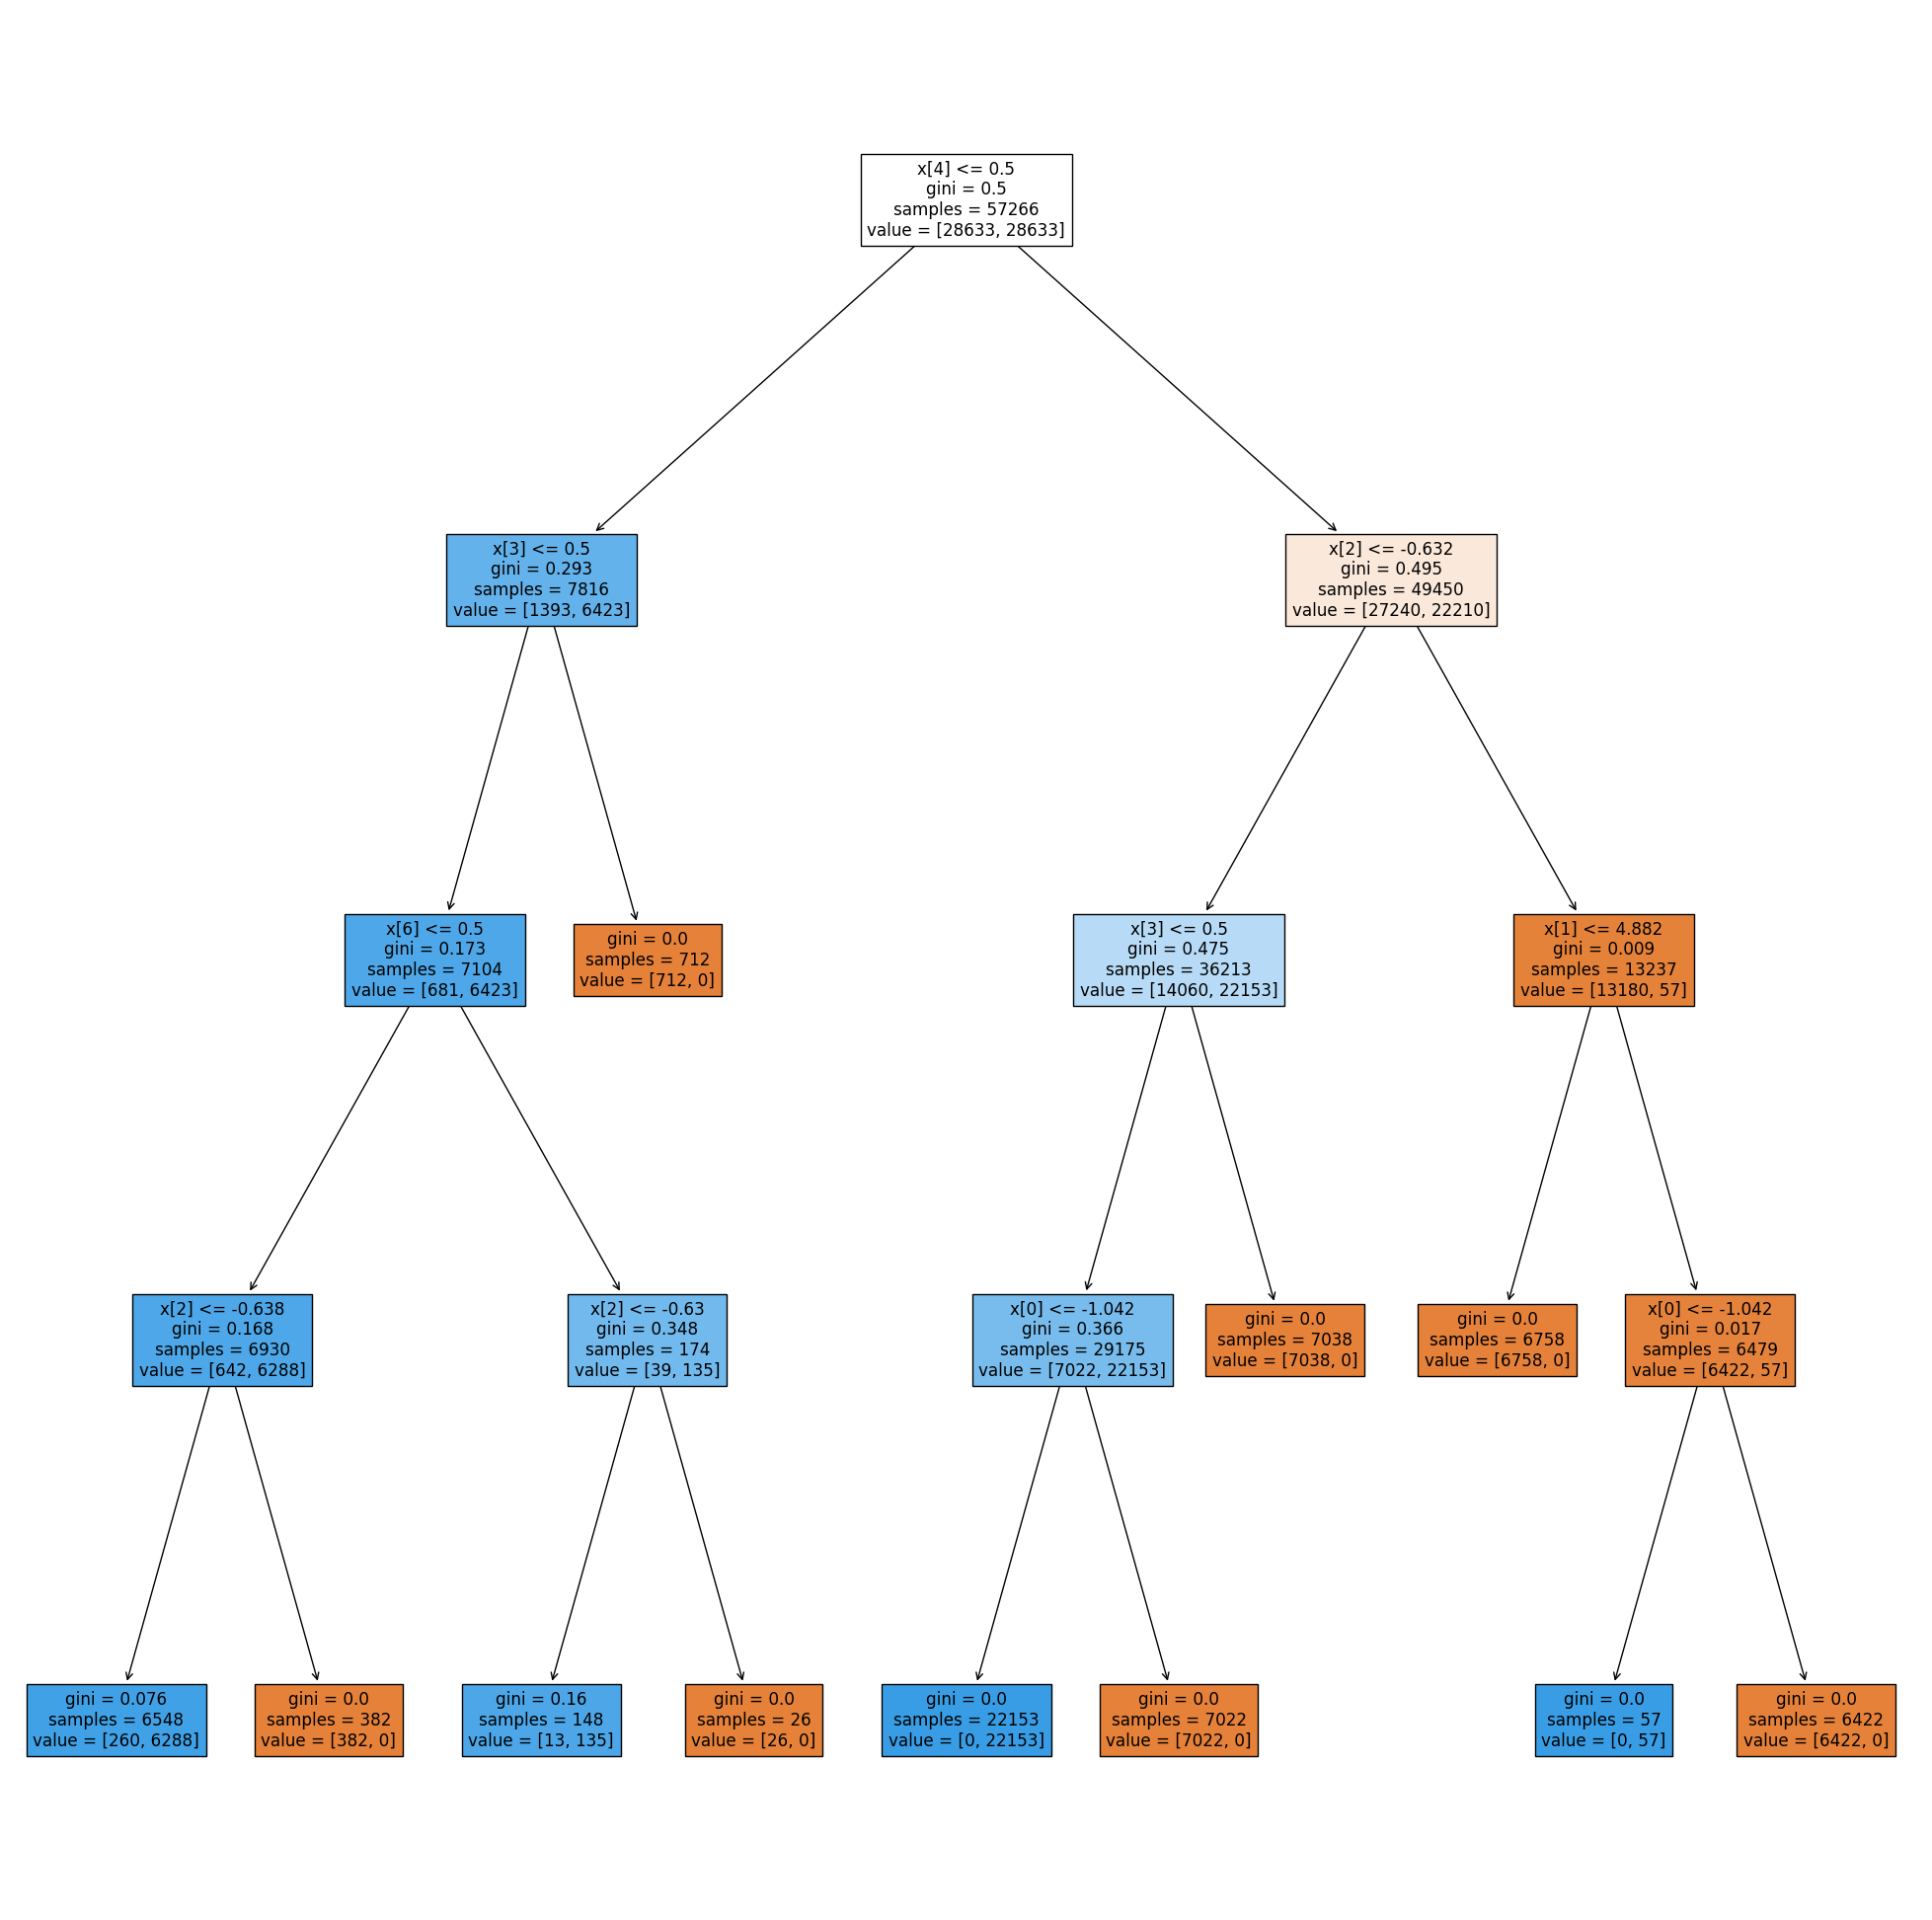

In [114]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(model_dt_tuned, filled =True)
plt.show()

### 2) K-Nearest Neighbour

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [116]:
model_knn = knn.fit(x_train_smote, y_train_smote)

y_pred_train_knn = model_knn.predict(x_train)
y_pred_test_knn = model_knn.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_knn)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_knn)}")

print("Training Report:\n",classification_report(y_train, y_pred_train_knn))
print()
print("Testing Report:\n",classification_report(y_test, y_pred_test_knn))

Training Accuracy: 0.9921588946459413
Testing Accuracy: 0.9872893064382426
Training Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     28633
           1       0.58      1.00      0.74       317

    accuracy                           0.99     28950
   macro avg       0.79      1.00      0.87     28950
weighted avg       1.00      0.99      0.99     28950


Testing Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7159
           1       0.46      0.95      0.62        79

    accuracy                           0.99      7238
   macro avg       0.73      0.97      0.81      7238
weighted avg       0.99      0.99      0.99      7238



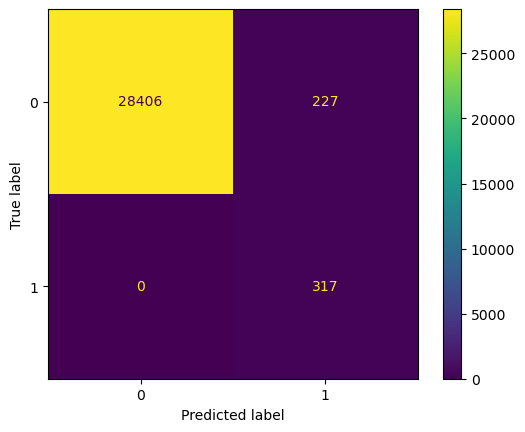

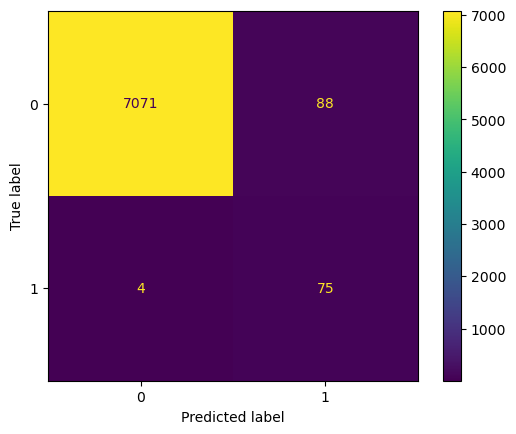

In [142]:
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_knn))

### Hypertuning the Parameters

In [180]:
parameters = {"n_neighbors":[5,10,15,20],
              "weights":['uniform', 'distance'],
              "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2]}


cv_knn =GridSearchCV(knn, cv=10,
                    param_grid=parameters,
                    n_jobs=3)

cv_knn.fit(x_train_smote,y_train_smote)
print('Best Parameters using grid search: \n', cv_knn.best_params_)

Best Parameters using grid search: 
 {'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [66]:
tuned_knn=KNeighborsClassifier(algorithm ='brute',weights ='distance')

In [205]:
tuned_knn.fit(x_train_smote,y_train_smote)

y_pred_train_tuned_knn = tuned_knn.predict(x_train)
y_pred_test_tuned_knn = tuned_knn.predict(x_test)

print("Training Accuracy:",accuracy_score(y_train,y_pred_train_tuned_knn))
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_tuned_knn))

print("Training Report:\n",classification_report(y_train,y_pred_train_tuned_knn))
print("Testing Report:\n",classification_report(y_test,y_pred_test_tuned_knn))

Training Accuracy: 1.0
Testing Accuracy: 0.9914340978170766
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950

Testing Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7159
           1       0.56      0.96      0.71        79

    accuracy                           0.99      7238
   macro avg       0.78      0.98      0.85      7238
weighted avg       0.99      0.99      0.99      7238



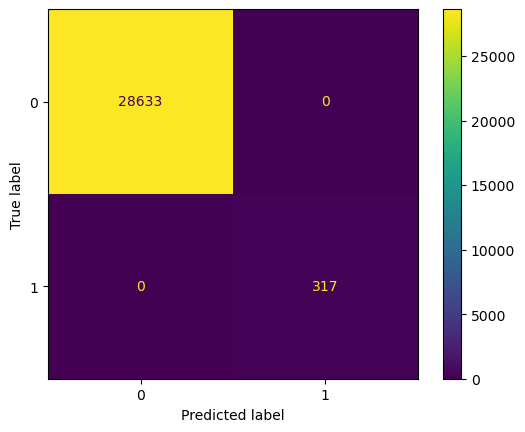

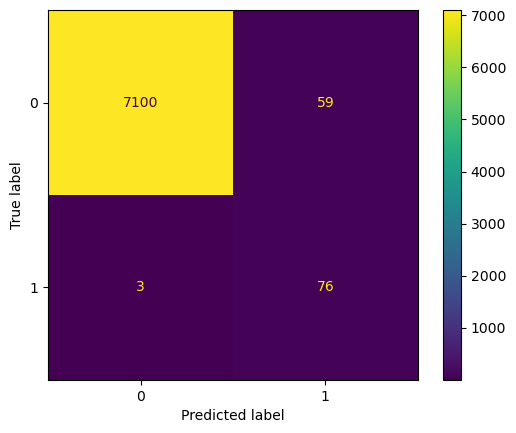

In [206]:
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_tuned_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_tuned_knn))

### 3) XG-Boost Classifier

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [68]:
model_xgb = xgb.fit(x_train_smote, y_train_smote)

y_pred_train_xgb = model_xgb.predict(x_train_smote)
y_pred_test_xgb = model_xgb.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train_xgb)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_xgb)}")

print("Training Report:\n",classification_report(y_train_smote, y_pred_train_xgb))
print()
print("Testing Report:\n",classification_report(y_test, y_pred_test_xgb))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00     28633

    accuracy                           1.00     57266
   macro avg       1.00      1.00      1.00     57266
weighted avg       1.00      1.00      1.00     57266


Testing Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238



### 4) Random Forest Classifier 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf =RandomForestClassifier()
model_rf = rf.fit(x_train_smote, y_train_smote)

y_train_pred_rf = model_rf.predict(x_train)
y_test_pred_rf = model_rf.predict(x_test)

print("Training Acuracy:", accuracy_score(y_train,y_train_pred_rf))
print("Testing Acuracy:", accuracy_score(y_test,y_test_pred_rf))

print("Training Report:\n",classification_report(y_train,y_train_pred_rf))
print("Testing Report:\n",classification_report(y_test,y_test_pred_rf))

Training Acuracy: 1.0
Testing Acuracy: 1.0
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950

Testing Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238



In [64]:
f1_scores = cross_val_score(model_rf,x_test, y_test, scoring='f1',cv=10 )
print("Max F1-Score:",f1_scores.max())
print("Mean F1_Score:",f1_scores.mean())

Max F1-Score: 1.0
Mean F1_Score: 1.0


In [65]:
accuracy = cross_val_score(model_rf,x_test, y_test, scoring='accuracy',cv=10 )
print("Max Accuracy:",accuracy.max())
print("Mean Accuracy:",accuracy.mean())

Max Accuracy: 1.0
Mean Accuracy: 1.0


### Hypertuning the Parameters

In [148]:
parameters = {'max_depth': [2,3,4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=parameters, 
                     n_jobs = 3)

cv_rf.fit(x_train_smote, y_train_smote)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}


In [71]:
# Set best parameters given by grid search 
rf.set_params(criterion = 'gini',
              max_features = 'auto',
              max_depth = 2)

RandomForestClassifier(max_depth=2, max_features='auto')

### OOB_Rate

In [158]:
rf.set_params(warm_start=True, 
              oob_score=True)

min_estimators = 101
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(x_train_smote,y_train_smote)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

In [160]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

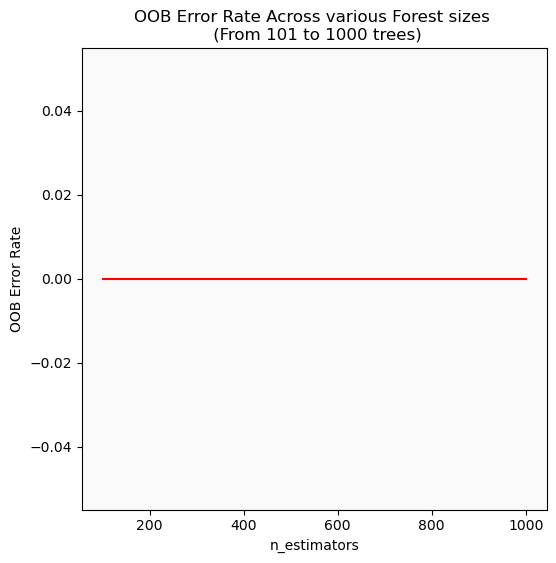

In [173]:
fig, ax = plt.subplots(figsize=(6,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n (From 101 to 1000 trees)')
plt.show()

In [72]:
# Refine the tree via OOB Output
rf.set_params(n_estimators=101,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=2, max_features='auto', n_estimators=101)

In [72]:
model_rf = rf.fit(x_train_smote, y_train_smote)

y_train_pred_rf = model_rf.predict(x_train)
y_test_pred_rf = model_rf.predict(x_test)

print("Training Acuracy:", accuracy_score(y_train,y_train_pred_rf))
print("Testing Acuracy:", accuracy_score(y_test,y_test_pred_rf))

print("Training Report:\n",classification_report(y_train,y_train_pred_rf))
print("Testing Report:\n",classification_report(y_test,y_test_pred_rf))

Training Acuracy: 1.0
Testing Acuracy: 1.0
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950

Testing Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238



### 5) Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr=LogisticRegression()
model_lr = lr.fit(x_train_smote, y_train_smote)

y_train_pred_lr = model_lr.predict(x_train)
y_test_pred_lr = model_lr.predict(x_test)

print("Training Acuracy:", accuracy_score(y_train,y_train_pred_lr))
print("Testing Acuracy:", accuracy_score(y_test,y_test_pred_lr))

print("Training Report:\n",classification_report(y_train,y_train_pred_lr))
print("Testing Report:\n",classification_report(y_test,y_test_pred_lr))

Training Acuracy: 0.9221761658031088
Testing Acuracy: 0.9187620889748549
Training Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     28633
           1       0.12      1.00      0.22       317

    accuracy                           0.92     28950
   macro avg       0.56      0.96      0.59     28950
weighted avg       0.99      0.92      0.95     28950

Testing Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      7159
           1       0.12      1.00      0.21        79

    accuracy                           0.92      7238
   macro avg       0.56      0.96      0.58      7238
weighted avg       0.99      0.92      0.95      7238



### 6) Stacking Classifier (DT + KNN + RF + XGB)

In [74]:
from sklearn.ensemble import StackingClassifier

In [75]:
estimators = [("KNN",tuned_knn),("R_Forest",model_rf),('XGB',model_xgb)]
classifier = StackingClassifier(estimators=estimators, final_estimator=model_dt_tuned, cv=10)
classifier.fit(x_train_smote, y_train_smote)

StackingClassifier(cv=10,
                   estimators=[('KNN',
                                KNeighborsClassifier(algorithm='brute',
                                                     weights='distance')),
                               ('R_Forest',
                                RandomForestClassifier(max_depth=2,
                                                       max_features='auto',
                                                       n_estimators=101)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_r...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=4,
                                                          max_features='auto',
                                                          min_samples_split=8))

In [221]:
y_pred_train_stacking = classifier.predict(x_train)
y_pred_test_stacking = classifier.predict(x_test)

# Accuracy Score
## Training
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train_stacking))
## Testing
print("Testing Accuracy: ",accuracy_score(y_test, y_pred_test_stacking))
print()

# Classification Report 
## Training
print("Training Report:\n",classification_report(y_train, y_pred_train_stacking))
print()
## Testing
print("Testing Report:\n",classification_report(y_test, y_pred_test_stacking))
print()

Training Accuracy:  1.0
Testing Accuracy:  1.0

Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950


Testing Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7238
   macro avg       1.00      1.00      1.00      7238
weighted avg       1.00      1.00      1.00      7238




### 7) Stacking Classifier (DT + KNN)

In [76]:
estimators = [("KNN",tuned_knn)]
classifier_2 =StackingClassifier(estimators=estimators, final_estimator=model_dt_tuned, cv=10)
classifier_2.fit(x_train_smote, y_train_smote)

StackingClassifier(cv=10,
                   estimators=[('KNN',
                                KNeighborsClassifier(algorithm='brute',
                                                     weights='distance'))],
                   final_estimator=DecisionTreeClassifier(max_depth=4,
                                                          max_features='auto',
                                                          min_samples_split=8))

In [200]:
y_pred_train_stacking = classifier_2.predict(x_train)
y_pred_test_stacking = classifier_2.predict(x_test)

# Accuracy Score
## Training
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train_stacking))
## Testing
print("Testing Accuracy: ",accuracy_score(y_test, y_pred_test_stacking))
print()

# Classification Report 
## Training
print("Training Report:\n",classification_report(y_train, y_pred_train_stacking))
print()
## Testing
print("Testing Report:\n",classification_report(y_test, y_pred_test_stacking))
print()

Training Accuracy:  1.0
Testing Accuracy:  0.9954407294832827

Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950


Testing Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       0.73      0.91      0.81        79

    accuracy                           1.00      7238
   macro avg       0.87      0.95      0.91      7238
weighted avg       1.00      1.00      1.00      7238




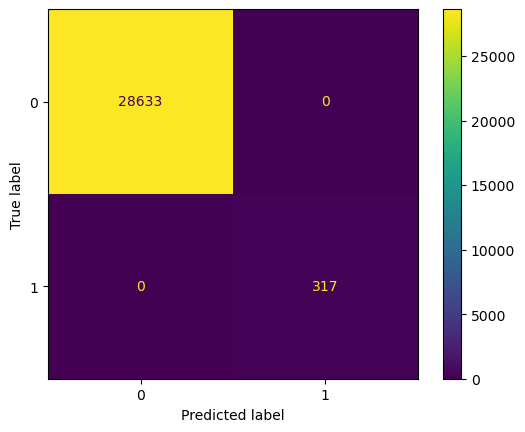

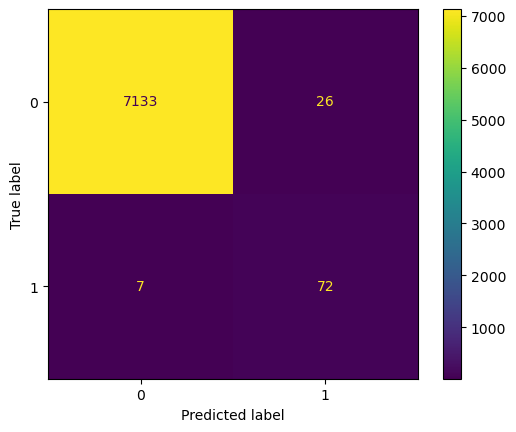

In [201]:
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_stacking))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_stacking))

### 8) Voting Classifier(DT +KNN)

In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
estimator =[("KNN",tuned_knn),('D_Tree', model_dt_tuned)]
voting = VotingClassifier(estimators=estimator)
voting.fit(x_train_smote, y_train_smote)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='brute',
                                                   weights='distance')),
                             ('D_Tree',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_features='auto',
                                                     min_samples_split=8))])

In [203]:
y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)

# Accuracy Score
## Training
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train_voting))
## Testing
print("Testing Accuracy: ",accuracy_score(y_test, y_pred_test_voting))
print()

# Classification Report 
## Training
print("Training Report:\n",classification_report(y_train, y_pred_train_voting))
print()
## Testing
print("Testing Report:\n",classification_report(y_test, y_pred_test_voting))
print()

Training Accuracy:  1.0
Testing Accuracy:  0.9995855208621166

Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28633
           1       1.00      1.00      1.00       317

    accuracy                           1.00     28950
   macro avg       1.00      1.00      1.00     28950
weighted avg       1.00      1.00      1.00     28950


Testing Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7159
           1       1.00      0.96      0.98        79

    accuracy                           1.00      7238
   macro avg       1.00      0.98      0.99      7238
weighted avg       1.00      1.00      1.00      7238




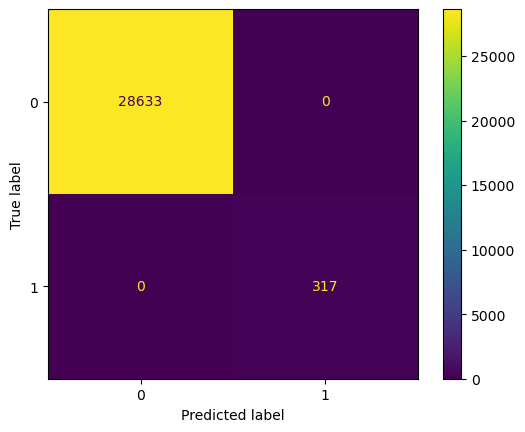

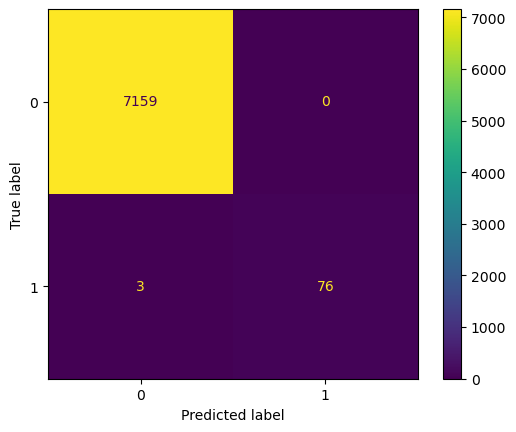

In [204]:
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_voting))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_voting))

### Evaluating the Models Perfomance

In [207]:
model_name =["D_Tree", "KNN","XG-Boost","Random Forest", "Logistic Regression", "Stacking","Stacking(DT+KNN)","Voting(DT+KNN)"]
f1_scores = [0.84,0.85,1,1,0.58,1,0.91,0.99]
df_f1 = pd.DataFrame({"Model":model_name, "F1-Score":f1_scores})

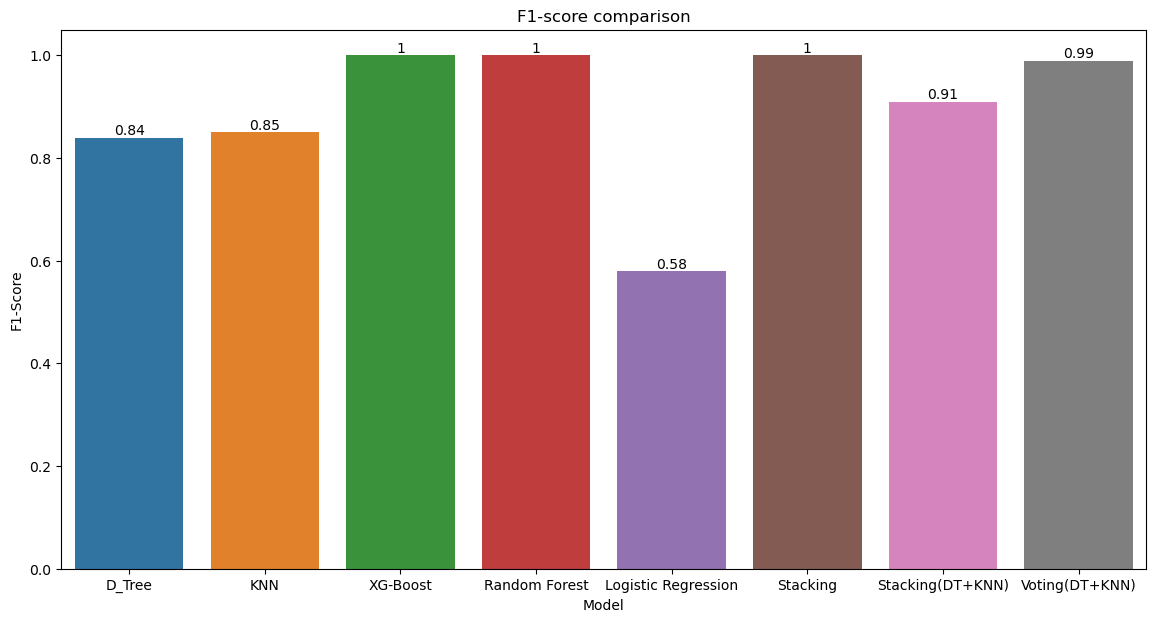

In [214]:
plt.figure(figsize=(14,7))
fig = sns.barplot(x="Model", y="F1-Score", data =df_f1)
fig.bar_label(fig.containers[0])
plt.title("F1-score comparison")
plt.show()